In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
import numpy as np
from joblib import dump, load
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import pickle
import dill
from joblib import dump, load
import statistics

In [2]:
file_path = '/Users/campbelle2/Desktop/obesity_prediction/'

rand_seeds = load(file_path + 'rand_seeds_200.joblib')

In [28]:
results = load('/Users/campbelle2/Desktop/obesity_prediction/NN_results_200.joblib')

In [4]:
results['auc']

{103689: [0.5943276353875374,
  0.7585763545762283,
  0.6876758268329093,
  0.5512061703216221,
  0.7296412326626156,
  0.7310993601199863,
  0.7385981511462473,
  0.7358273235073556,
  0.7401487913766882,
  0.7262375335534017,
  0.7309686507853074,
  0.7387299117624383,
  0.7493320858126057,
  0.7386223306210271,
  0.7383756298928394,
  0.38280874385876384,
  0.7309465738735519,
  0.737695100327299,
  0.7465560017661529,
  0.7252864742120645,
  0.7370986732827316,
  0.7305358732294667,
  0.7397026975883603,
  0.7415087992262568,
  0.7644582746367823,
  0.7597947898488258,
  0.7575233209282115,
  0.7586366280495924,
  0.7236685519648453,
  0.7411541669294871,
  0.7316130863522634,
  0.7394545951514898,
  0.7432868666904957,
  0.7338673843415122,
  0.7346400762529524,
  0.7439148321804279,
  0.7564187744860985,
  0.7562519711528355,
  0.7613408745260473,
  0.7549984931631659,
  0.734584007905637,
  0.7449054897920565,
  0.7446847206745023,
  0.7378114421479782,
  0.7443178234267572,
  0

In [5]:
auc_plot = []

In [6]:
auc_plot = []
for seed in results['auc']:
    auc_plot.append(results['auc'][seed])
auc_plot = np.array(auc_plot)        

In [7]:
auc_plot.shape

(200, 48)

In [8]:
mean_auc = np.mean(auc_plot, axis = 0)

In [9]:
max(mean_auc)

0.76322474296167

In [10]:
max_id = np.where(mean_auc == max(mean_auc))[0][0]

In [11]:
opt_col = auc_plot[:,max_id]

(array([ 2.,  0.,  0.,  5., 12., 41., 62., 55., 20.,  3.]),
 array([0.70973942, 0.71791461, 0.72608979, 0.73426498, 0.74244016,
        0.75061535, 0.75879054, 0.76696572, 0.77514091, 0.78331609,
        0.79149128]),
 <a list of 10 Patch objects>)

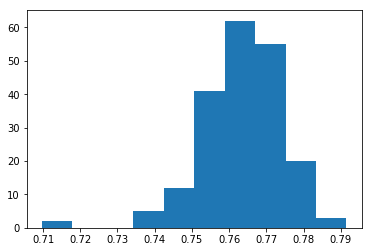

In [12]:
plt.hist(opt_col)

In [13]:
with open(file_path + 'ml_data.pik', "rb") as f:
            data = dill.load(f)

In [14]:
x = data['x']
y = data['y']

In [20]:
statistics.mean(opt_col)

0.7632247429616703

In [21]:
statistics.stdev(opt_col)

0.010761319939279826

In [30]:
def subgroup_analysis(subgroup_name):
    bootstrap_subgroup_metrics = dict.fromkeys(rand_seeds)

    for seed in rand_seeds:
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, stratify = y, random_state = seed)

        temp_df = pd.DataFrame()
        temp_df[subgroup_name] = x_test[subgroup_name].values
        temp_df['y_true'] = y_test.values
        temp_df['y_pred_prob'] = results['prediction_probabilities'][seed][max_id][:,1]
        if subgroup_name == 'race':
            temp_df = temp_df.loc[temp_df[subgroup_name]!= 6]

        subgroup_cat = temp_df[subgroup_name].unique()
        subgroup_metrics = dict.fromkeys(subgroup_cat)

        for cat in subgroup_cat:
            subset = temp_df.loc[temp_df[subgroup_name] == cat]
            auc = roc_auc_score(subset.y_true.values, subset.y_pred_prob.values)
            subgroup_metrics[cat] = auc

        bootstrap_subgroup_metrics[seed] = subgroup_metrics
        
    metrics = list(bootstrap_subgroup_metrics.values())
    res_list = dict.fromkeys(subgroup_cat)
    for i in res_list:
        res_list[i] = []

    for cat in subgroup_cat:
        for res in metrics:
            res_list[cat].append(res[cat])
    
    
    return bootstrap_subgroup_metrics, res_list
    

In [29]:
print(results.keys())

dict_keys(['auc', 'prediction_probabilities'])


In [31]:
_, gender_metrics = subgroup_analysis('gender_concept_id')

In [32]:
male = gender_metrics[0]

In [38]:
female = gender_metrics[1]

In [34]:
statistics.mean(male)

0.7609076284315011

In [36]:
statistics.stdev(male)

0.013949395630967728

In [39]:
statistics.mean(female)

0.7663645379013545

In [40]:
statistics.stdev(female)

0.013815479933281092

In [41]:
_, medicaid_metrics = subgroup_analysis('medicaid') 

In [42]:
no_med = medicaid_metrics[0]
med = medicaid_metrics[1]

In [43]:
statistics.stdev(no_med)

0.012567330328394126

In [44]:
statistics.mean(no_med)

0.7407655169512036

In [45]:
statistics.mean(med)

0.7881611635111251

In [46]:
statistics.stdev(med)

0.014879956118493246

In [47]:
_, agecat_metrics = subgroup_analysis('age_cat') 

In [48]:
young = agecat_metrics[1]

In [49]:
statistics.mean(young)

0.7466266729960384

In [50]:
statistics.stdev(young)

0.017882128296887026

In [51]:
middle = agecat_metrics[2]

In [52]:
statistics.mean(middle)

0.7902026839225598

In [53]:
statistics.stdev(middle)

0.01478201310116382

In [54]:
old = agecat_metrics[3]

In [55]:
statistics.mean(old)

0.7452921954129784

In [56]:
statistics.stdev(old)

0.01647807238982988

In [57]:
_, asian = subgroup_analysis('race_1')

In [58]:
asian = asian[1]

In [59]:
statistics.mean(asian)

0.7417774057526426

In [60]:
statistics.stdev(asian)

0.05626560234016973

In [61]:
_, AA = subgroup_analysis('race_2')
AA = AA[1]
statistics.mean(AA)


0.7789487449058017

In [62]:
statistics.stdev(AA)

0.01736566855923235

In [63]:
_, white = subgroup_analysis('race_3')
white = white[1]
statistics.mean(white)


0.7414988350125494

In [64]:
statistics.stdev(white)

0.01343794447993891

In [65]:
_, hispanic = subgroup_analysis('race_4')
hispanic = hispanic[1]
statistics.mean(hispanic)

0.7439585056903927

In [66]:
statistics.stdev(hispanic)

0.042580952160794584

In [67]:
_, multi = subgroup_analysis('race_5')
multi = multi[1]
statistics.mean(multi)

0.7476663213703725

In [68]:
statistics.stdev(multi)

0.07331334626892425

In [69]:
_, unknown = subgroup_analysis('race_7')
unknown = unknown[1]
statistics.mean(unknown)

0.716323641223215

In [70]:
statistics.stdev(unknown)

0.035644302753486776